In [17]:
from elos.elo_tracker import EloTracker
from utils.utils import load_all_games_csv, get_teams, plot_elo_ratings_over_time, plot_elos_distribution
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot as plt

# All Season Elos

This notebook will collect the Elo ratings over time for all teams given in `gameinfo_cleaned.csv`. Here the ratings are simply calculated
via final results (win or loss), meaning play-by-play data is unnecessary.

It will then look into the distribution and create a Gaussian approximation.

## Get all Games

In [18]:
all_games = load_all_games_csv('../data/gameinfo_cleaned.csv')

/Users/lancehendricks/Documents/College Coding/ML/Elo Ratings/src/utils/utils.py:17: DtypeWarning: Columns (10,11,13,17,19,21,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  all_games = pd.read_csv(filename)


## Elo Ratings Updates for All Years

In [19]:
teams = get_teams(all_games)
et = EloTracker(teams)

et.add_history(all_games)

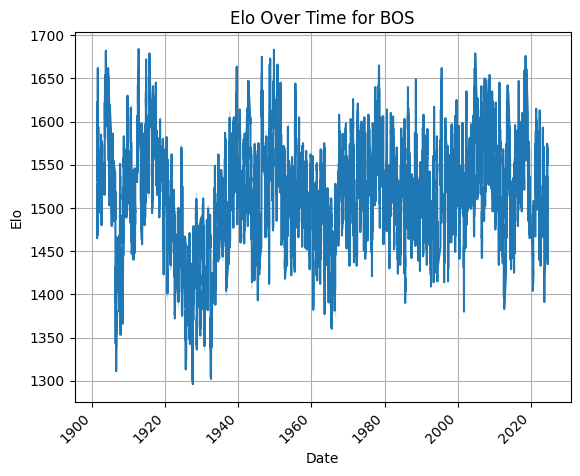

In [20]:
# Example: Red Sox
plot_elo_ratings_over_time('BOS', et.elos_map)

## Elo Ratings Distributions

### For all Teams over All Years

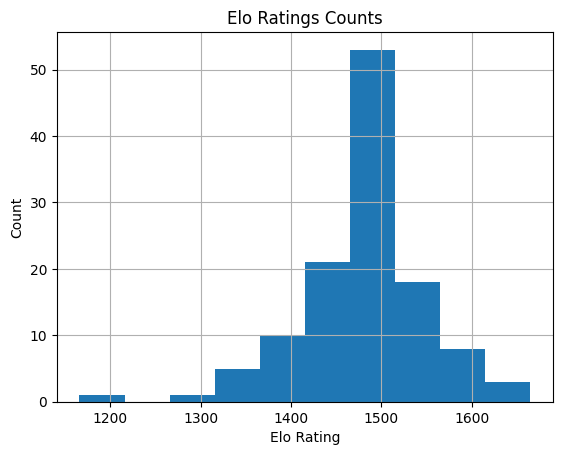

Mean: 1480.9166666666667
Std: 70.63705157745159


In [21]:
# Plot distribution of elos for all teams
mean, std = plot_elos_distribution(teams, et.elos_map)
print("Mean:", mean)
print("Std:",std)


### For 2024 Teams over All Years

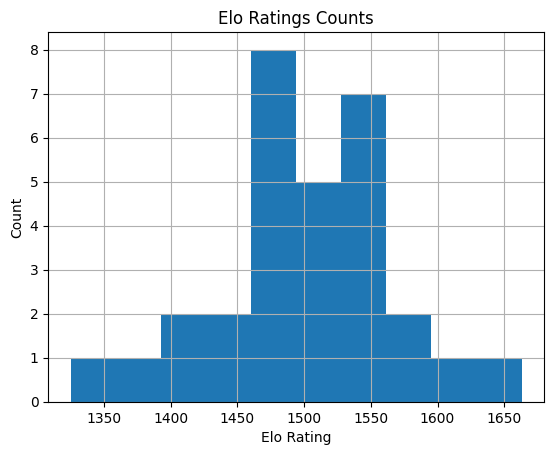

Mean: 1500.0666666666666
Std: 69.9208759162018


In [22]:
# Plot distribution of elos for all teams
games_24 = all_games[all_games['season']==2024]
teams_24 = get_teams(games_24)


mean, std = plot_elos_distribution(teams_24, et.elos_map)
print("Mean:", mean)
print("Std:",std)

### Gaussian Approximation

Text(0.5, 1.0, 'Elo Rating Normal PDF')

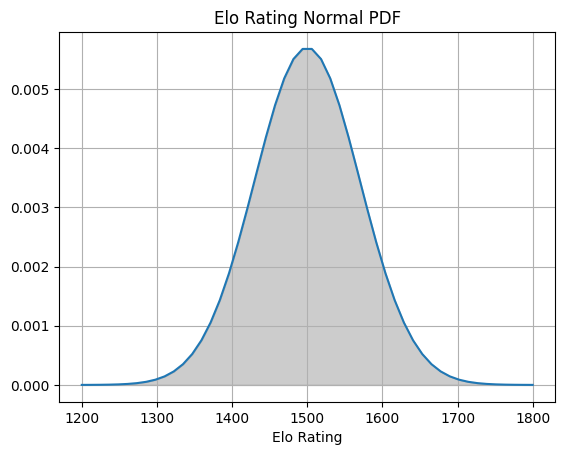

In [24]:
xp = np.linspace(1200,1800)
yp = norm.pdf(xp, loc=1500, scale=70)
plt.grid()
plt.plot(xp,yp)
plt.fill_between(xp, yp, color='gray', alpha=0.4)
plt.xlabel("Elo Rating")
plt.title("Elo Rating Normal PDF")